In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2023-05-25 10:24:57.889361: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 10:24:58.071260: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 10:24:58.072405: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 10:24:59.354307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test)= datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes =["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck" ]

In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

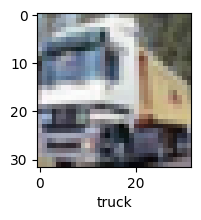

In [8]:
plot_sample(x_train, y_train,1)

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
x_train=x_train/255 #normalization values between 1 and 0
x_test=x_test/255

In [11]:
#CNN
cnn=models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64,  activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=10)

### Accuracy

In [1]:
cnn.evaluate(x_test,y_test)

NameError: name 'cnn' is not defined

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

In [ ]:
plot_sample(x_test, y_test,1)

In [2]:
y_pred=cnn.predict(x_test)
y_pred[:5]

NameError: name 'cnn' is not defined

In [18]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

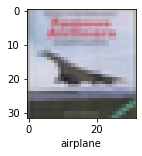

In [23]:
plot_sample(x_test, y_test, 3)

### Evaluated Output and Metrics

In [24]:
classes[y_classes[3]]

'airplane'

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=cnn.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report: \n", classification_report(y_test, y_classes))

313/313 [==============================] - 3s 10ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.66      0.78      0.72      1000
           1       0.73      0.87      0.79      1000
           2       0.65      0.51      0.57      1000
           3       0.59      0.40      0.48      1000
           4       0.63      0.64      0.63      1000
           5       0.58      0.61      0.59      1000
           6       0.77      0.80      0.78      1000
           7       0.69      0.77      0.73      1000
           8       0.77      0.75      0.76      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000

